Sales Forecast - MSE: 41896.213221343576
Sales Forecast - R-squared: 0.8568772264250432


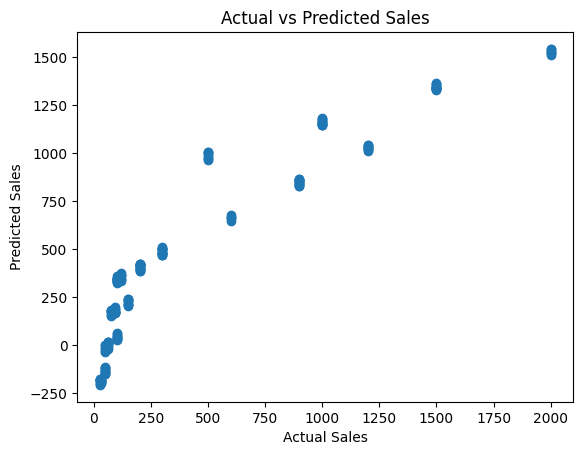

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data_sales = pd.read_csv("retail_sales.csv")

# Define features and target
X_sales = data_sales[['Age', 'Quantity', 'Price per Unit']]
y_sales = data_sales['Total Amount']

# Split the data
X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(
    X_sales, y_sales, test_size=0.2, random_state=42
)

# Build and train the model
model_sales = LinearRegression()
model_sales.fit(X_train_sales, y_train_sales)

# Make predictions
y_pred_sales = model_sales.predict(X_test_sales)

# Evaluate the model
mse_sales = mean_squared_error(y_test_sales, y_pred_sales)
r2_sales = r2_score(y_test_sales, y_pred_sales)

# Output evaluation metrics
print(f"Sales Forecast - MSE: {mse_sales}")
print(f"Sales Forecast - R-squared: {r2_sales}")

# Plot actual vs predicted sales
plt.scatter(y_test_sales, y_pred_sales)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [10]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Download stopwords (do this once at the start)
nltk.download('stopwords')

# Load the dataset with proper encoding
df = pd.read_csv('spam.csv', encoding='latin-1')

# Drop unnecessary columns
df = df[['v1', 'v2']]

# Rename columns for clarity
df.columns = ['label', 'message']

# Map 'ham' and 'spam' to binary labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Initialize stopwords set and stemmer
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Preprocess the messages
corpus = []

for msg in df['message']:
    # Remove non-alphabetic characters and convert to lowercase
    msg = re.sub('[^a-zA-Z]', ' ', msg)
    msg = msg.lower()
    msg = msg.split()
    
    # Remove stopwords and apply stemming
    msg = [ps.stem(word) for word in msg if word not in stop_words]
    
    # Join words back into one string per message
    cleaned_msg = " ".join(msg)
    
    # Append cleaned message to corpus
    corpus.append(cleaned_msg)

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(corpus).toarray()

# Define the target variable
y = df['label'].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict the test set results
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aquib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.97847533632287
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.86      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv('BankChurners.csv')

# Drop the 'CLIENTNUM' column as it is just an identifier
df = df.drop(columns=['CLIENTNUM'])

# Encode categorical variables
label_enc = LabelEncoder()

# List of categorical columns (based on inspection)
categorical_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 
                    'Marital_Status', 'Income_Category', 'Card_Category']

# Apply label encoding to all categorical columns
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

# Define features and target variable
X = df.drop(columns=['Attrition_Flag'])  # Features
y = df['Attrition_Flag']                 # Target (0 = Attrited, 1 = Existing)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM Model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = svm_model.predict(X_test)

# Evaluation Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9249753208292202
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.64      0.73       327
           1       0.93      0.98      0.96      1699

    accuracy                           0.92      2026
   macro avg       0.90      0.81      0.85      2026
weighted avg       0.92      0.92      0.92      2026



In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv")

# Reduce dataset size for faster processing (optional)
df = df.sample(frac=0.1, random_state=42)

# Define features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify maintains class ratio
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", sum(y_train == 1), "fraud cases.")
print("After SMOTE:", sum(y_train_resampled == 1), "fraud cases.")

# Train SVM Model with class weight balanced
svm_model = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

# Predict and Evaluate
y_pred = svm_model.predict(X_test)

# Evaluation Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))



Before SMOTE: 37 fraud cases.
After SMOTE: 22747 fraud cases.
Accuracy: 0.9963138493944181
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5688
           1       0.29      0.89      0.43         9

    accuracy                           1.00      5697
   macro avg       0.64      0.94      0.72      5697
weighted avg       1.00      1.00      1.00      5697

